In [1]:
import pandas as pd

# Preprocessing

## Read Data

In [178]:
# path ="https://raw.githubusercontent.com/alwanrahmanas/datslay/main/train.csv"
path ="https://raw.githubusercontent.com/alwanrahmanas/datslay/main/test.csv"

data = pd.read_csv(path)
data

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
0,137142,CADILUXE,MID-SIZE,3.6,NaN,AS8,X,6.40 km/L,1.77 L/100 km,25.04 MPG (AS)
1,137143,FOLD,VAN - PASSENGER,3.7,6.0,AS6,X,21.11 L/100km,14.38 liters per 100 km,5.53 km per L
2,137144,MITSU,SUV - SMALL,6.0,NaN,AV6,X,9.60 MPG (AS),27.45 mpg Imp.,12.99 MPG (AS)
3,137145,LECUS,MID-SIZE,4.6,NaN,AS8,Z,1.68 L/10km,6.29 km/L,16.42 L/100km
4,137146,BMV,SUV - STANDARD,4.4,8.0,AS8,Z,5.65 MPG (AS),14.75 mpg Imp.,31.52 L/100km
...,...,...,...,...,...,...,...,...,...,...
58771,195913,KIO,SUV - SMALL,3.3,NaN,A6,X,15.39 mpg Imp.,2.09 L/10km,1.95 L/10km
58772,195914,FOLD,unspecified,1.6,4.0,AS6,X,38.00 MPG (AS),35.64 MPG (AS),15.69 km/L
58773,195915,CHEVO,SUV - STANDARD,3.5,unestablished,A6,X,6.90 km/L,21.38 MPG (AS),18.20 MPG (AS)
58774,195916,FOLD,unknown,5.0,8.0,AS6,X,27.93 MPG (AS),51.20 MPG (AS),42.16 mpg Imp.


In [3]:
data.isna().sum()

Id                           0
Make                         0
Vehicle Class             1325
Engine Size(L)           16619
Cylinders                14155
Transmission              2605
Fuel Type                 1855
Fuel Consumption City     2422
Fuel Consumption Hwy      2568
Fuel Consumption Comb     2582
CO2 Emissions(g/km)          0
dtype: int64

##**Data Cleaning**

## 1. Fuel Consumption City, Fuel Consumption Highway, and Fuel Consumption Combine

In [179]:
data[['Id','Fuel Consumption City','Fuel Consumption Hwy','Fuel Consumption Comb']]

,Id,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
0,137142,6.40 km/L,1.77 L/100 km,25.04 MPG (AS)
1,137143,21.11 L/100km,14.38 liters per 100 km,5.53 km per L
2,137144,9.60 MPG (AS),27.45 mpg Imp.,12.99 MPG (AS)
3,137145,1.68 L/10km,6.29 km/L,16.42 L/100km
4,137146,5.65 MPG (AS),14.75 mpg Imp.,31.52 L/100km
...,...,...,...,...
58771,195913,15.39 mpg Imp.,2.09 L/10km,1.95 L/10km
58772,195914,38.00 MPG (AS),35.64 MPG (AS),15.69 km/L
58773,195915,6.90 km/L,21.38 MPG (AS),18.20 MPG (AS)
58774,195916,27.93 MPG (AS),51.20 MPG (AS),42.16 mpg Imp.


### Split With Regex from Value and Unit

In [180]:
#Split With Regex from Value and Unit
numeric_extract_fuel = pd.DataFrame()
unit_extract_fuel = pd.DataFrame()
clean_fuel = pd.DataFrame()

numeric_extract_fuel['Numeric Fuel City'] = (data['Fuel Consumption City'].str.extract(r'(\d+\.\d+)\s', expand=True))
numeric_extract_fuel['Numeric Fuel Hwy'] = data['Fuel Consumption Hwy'].str.extract(r'(\d+\.\d+)\s', expand=True)
numeric_extract_fuel['Numeric Fuel Comb'] = data['Fuel Consumption Comb'].str.extract(r'(\d+\.\d+)\s', expand=True)
numeric_extract_fuel['id'] = data['Id']

unit_extract_fuel['Unit Fuel City'] = data['Fuel Consumption City'].str.extract(r'\d+\.\d+\s(.+)', expand=True)
unit_extract_fuel['Unit Fuel Hwy'] = data['Fuel Consumption Hwy'].str.extract(r'\d+\.\d+\s(.+)', expand=True)
unit_extract_fuel['Unit Fuel Comb'] = data['Fuel Consumption Comb'].str.extract(r'\d+\.\d+\s(.+)', expand=True)
unit_extract_fuel['id'] = data['Id']

clean_fuel = pd.merge(numeric_extract_fuel, unit_extract_fuel, left_on='id', right_on='id', how='inner')
clean_fuel['Numeric Fuel City'] = pd.to_numeric(clean_fuel['Numeric Fuel City'], errors='coerce')
clean_fuel['Numeric Fuel Hwy'] = pd.to_numeric(clean_fuel['Numeric Fuel Hwy'], errors='coerce')
clean_fuel['Numeric Fuel Comb'] = pd.to_numeric(clean_fuel['Numeric Fuel Comb'], errors='coerce')
#clean_fuel[['Numeric Fuel City','Numeric Fuel Hwy','Numeric Fuel Comb']].apply(pd.to_numeric)
#clean_fuel = clean_fuel[]
clean_fuel = clean_fuel[['id','Numeric Fuel City','Numeric Fuel Hwy','Numeric Fuel Comb','Unit Fuel City','Unit Fuel Hwy','Unit Fuel Comb']]
clean_fuel

,id,Numeric Fuel City,Numeric Fuel Hwy,Numeric Fuel Comb,Unit Fuel City,Unit Fuel Hwy,Unit Fuel Comb
0,137142,6.40,1.77,25.04,km/L,L/100 km,MPG (AS)
1,137143,21.11,14.38,5.53,L/100km,liters per 100 km,km per L
2,137144,9.60,27.45,12.99,MPG (AS),mpg Imp.,MPG (AS)
3,137145,1.68,6.29,16.42,L/10km,km/L,L/100km
4,137146,5.65,14.75,31.52,MPG (AS),mpg Imp.,L/100km
...,...,...,...,...,...,...,...
58771,195913,15.39,2.09,1.95,mpg Imp.,L/10km,L/10km
58772,195914,38.00,35.64,15.69,MPG (AS),MPG (AS),km/L
58773,195915,6.90,21.38,18.20,km/L,MPG (AS),MPG (AS)
58774,195916,27.93,51.20,42.16,MPG (AS),MPG (AS),mpg Imp.


In [6]:
clean_fuel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137141 entries, 0 to 137140
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 137141 non-null  int64  
 1   Numeric Fuel City  131093 non-null  float64
 2   Numeric Fuel Hwy   130653 non-null  float64
 3   Numeric Fuel Comb  130651 non-null  float64
 4   Unit Fuel City     131093 non-null  object 
 5   Unit Fuel Hwy      130653 non-null  object 
 6   Unit Fuel Comb     130651 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 8.4+ MB


In [7]:
clean_fuel['Unit Fuel Comb'].unique()

array(['mpg Imp.', 'L/100 km', nan, 'L/10km', 'MPG (AS)', 'km/L',
       'L/100km', 'km per L', 'liters per 100 km'], dtype=object)

In [8]:
clean_fuel['Unit Fuel City'].unique()

array(['liters per 100 km', 'L/10km', 'km per L', 'L/100km', 'MPG (AS)',
       'mpg Imp.', nan, 'L/100 km', 'km/L'], dtype=object)

In [9]:
clean_fuel['Unit Fuel Hwy'].unique()

array(['L/100 km', 'liters per 100 km', 'L/10km', 'mpg Imp.', 'L/100km',
       'km per L', nan, 'km/L', 'MPG (AS)'], dtype=object)

The unit that have to change in L/100 km:

1. liters per 100 km and L/100km

2. L/10 km (multiply with 10)

3. km per L and km/L (change by 100/value)

4. mpg Imp. (change by 282.481/value)

5. MPG AS (change by 235.215/value)

In [181]:
clean_fuel.loc[(clean_fuel['Unit Fuel City']==('liters per 100 km')) | (clean_fuel['Unit Fuel City']==('L/100km')),'Unit Fuel City']='L/100 km'

clean_fuel.loc[clean_fuel['Unit Fuel City']==('L/10km'),'Numeric Fuel City']= clean_fuel.loc[clean_fuel['Unit Fuel City']==('L/10km'),'Numeric Fuel City']*10
clean_fuel.loc[clean_fuel['Unit Fuel City']==('L/10km'),'Unit Fuel City']= 'L/100 km'

clean_fuel.loc[(clean_fuel['Unit Fuel City']==('km per L')) | (clean_fuel['Unit Fuel City']==('km/L')),'Numeric Fuel City'] = 100/(clean_fuel.loc[(clean_fuel['Unit Fuel City']==('km per L')) | (clean_fuel['Unit Fuel City']==('km/L')),'Numeric Fuel City'])
clean_fuel.loc[(clean_fuel['Unit Fuel City']==('km per L')) | (clean_fuel['Unit Fuel City']==('km/L')),'Unit Fuel City']='L/100 km'

clean_fuel.loc[clean_fuel['Unit Fuel City']==('mpg Imp.'),'Numeric Fuel City']= 282.481/clean_fuel.loc[clean_fuel['Unit Fuel City']==('mpg Imp.'),'Numeric Fuel City']
clean_fuel.loc[clean_fuel['Unit Fuel City']==('mpg Imp.'),'Unit Fuel City']= 'L/100 km'

clean_fuel.loc[clean_fuel['Unit Fuel City']==('MPG (AS)'),'Numeric Fuel City']= 235.215/clean_fuel.loc[clean_fuel['Unit Fuel City']==('MPG (AS)'),'Numeric Fuel City']
clean_fuel.loc[clean_fuel['Unit Fuel City']==('MPG (AS)'),'Unit Fuel City']= 'L/100 km'

clean_fuel


,id,Numeric Fuel City,Numeric Fuel Hwy,Numeric Fuel Comb,Unit Fuel City,Unit Fuel Hwy,Unit Fuel Comb
0,137142,15.625000,1.77,25.04,L/100 km,L/100 km,MPG (AS)
1,137143,21.110000,14.38,5.53,L/100 km,liters per 100 km,km per L
2,137144,24.501563,27.45,12.99,L/100 km,mpg Imp.,MPG (AS)
3,137145,16.800000,6.29,16.42,L/100 km,km/L,L/100km
4,137146,41.630973,14.75,31.52,L/100 km,mpg Imp.,L/100km
...,...,...,...,...,...,...,...
58771,195913,18.354841,2.09,1.95,L/100 km,L/10km,L/10km
58772,195914,6.189868,35.64,15.69,L/100 km,MPG (AS),km/L
58773,195915,14.492754,21.38,18.20,L/100 km,MPG (AS),MPG (AS)
58774,195916,8.421590,51.20,42.16,L/100 km,MPG (AS),mpg Imp.


In [182]:
clean_fuel.loc[(clean_fuel['Unit Fuel Hwy']==('liters per 100 km')) | (clean_fuel['Unit Fuel Hwy']==('L/100km')),'Unit Fuel Hwy']='L/100 km'

clean_fuel.loc[clean_fuel['Unit Fuel Hwy']==('L/10km'),'Numeric Fuel Hwy']= clean_fuel.loc[clean_fuel['Unit Fuel Hwy']==('L/10km'),'Numeric Fuel Hwy']*10
clean_fuel.loc[clean_fuel['Unit Fuel Hwy']==('L/10km'),'Unit Fuel Hwy']= 'L/100 km'

clean_fuel.loc[(clean_fuel['Unit Fuel Hwy']==('km per L')) | (clean_fuel['Unit Fuel Hwy']==('km/L')),'Numeric Fuel Hwy'] = 100/(clean_fuel.loc[(clean_fuel['Unit Fuel Hwy']==('km per L')) | (clean_fuel['Unit Fuel Hwy']==('km/L')),'Numeric Fuel Hwy'])
clean_fuel.loc[(clean_fuel['Unit Fuel Hwy']==('km per L')) | (clean_fuel['Unit Fuel Hwy']==('km/L')),'Unit Fuel Hwy']='L/100 km'

clean_fuel.loc[clean_fuel['Unit Fuel Hwy']==('mpg Imp.'),'Numeric Fuel Hwy']= 282.481/clean_fuel.loc[clean_fuel['Unit Fuel Hwy']==('mpg Imp.'),'Numeric Fuel Hwy']
clean_fuel.loc[clean_fuel['Unit Fuel Hwy']==('mpg Imp.'),'Unit Fuel Hwy']= 'L/100 km'

clean_fuel.loc[clean_fuel['Unit Fuel Hwy']==('MPG (AS)'),'Numeric Fuel Hwy']= 235.215/clean_fuel.loc[clean_fuel['Unit Fuel Hwy']==('MPG (AS)'),'Numeric Fuel Hwy']
clean_fuel.loc[clean_fuel['Unit Fuel Hwy']==('MPG (AS)'),'Unit Fuel Hwy']= 'L/100 km'

clean_fuel


,id,Numeric Fuel City,Numeric Fuel Hwy,Numeric Fuel Comb,Unit Fuel City,Unit Fuel Hwy,Unit Fuel Comb
0,137142,15.625000,1.770000,25.04,L/100 km,L/100 km,MPG (AS)
1,137143,21.110000,14.380000,5.53,L/100 km,L/100 km,km per L
2,137144,24.501563,10.290747,12.99,L/100 km,L/100 km,MPG (AS)
3,137145,16.800000,15.898251,16.42,L/100 km,L/100 km,L/100km
4,137146,41.630973,19.151254,31.52,L/100 km,L/100 km,L/100km
...,...,...,...,...,...,...,...
58771,195913,18.354841,20.900000,1.95,L/100 km,L/100 km,L/10km
58772,195914,6.189868,6.599747,15.69,L/100 km,L/100 km,km/L
58773,195915,14.492754,11.001637,18.20,L/100 km,L/100 km,MPG (AS)
58774,195916,8.421590,4.594043,42.16,L/100 km,L/100 km,mpg Imp.


In [12]:
clean_fuel.loc[(clean_fuel['Unit Fuel Comb']==('liters per 100 km')) | (clean_fuel['Unit Fuel Comb']==('L/100km')),'Unit Fuel Comb']='L/100 km'

clean_fuel.loc[clean_fuel['Unit Fuel Comb']==('L/10km'),'Numeric Fuel Comb']= clean_fuel.loc[clean_fuel['Unit Fuel Comb']==('L/10km'),'Numeric Fuel Comb']*10
clean_fuel.loc[clean_fuel['Unit Fuel Comb']==('L/10km'),'Unit Fuel Comb']= 'L/100 km'

clean_fuel.loc[(clean_fuel['Unit Fuel Comb']==('km per L')) | (clean_fuel['Unit Fuel Comb']==('km/L')),'Numeric Fuel Comb'] = 100/(clean_fuel.loc[(clean_fuel['Unit Fuel Comb']==('km per L')) | (clean_fuel['Unit Fuel Comb']==('km/L')),'Numeric Fuel Comb'])
clean_fuel.loc[(clean_fuel['Unit Fuel Comb']==('km per L')) | (clean_fuel['Unit Fuel Comb']==('km/L')),'Unit Fuel Comb']='L/100 km'

clean_fuel.loc[clean_fuel['Unit Fuel Comb']==('mpg Imp.'),'Numeric Fuel Comb']= 282.481/clean_fuel.loc[clean_fuel['Unit Fuel Comb']==('mpg Imp.'),'Numeric Fuel Comb']
clean_fuel.loc[clean_fuel['Unit Fuel Comb']==('mpg Imp.'),'Unit Fuel Comb']= 'L/100 km'

clean_fuel.loc[clean_fuel['Unit Fuel Comb']==('MPG (AS)'),'Numeric Fuel Comb']= 235.215/clean_fuel.loc[clean_fuel['Unit Fuel Comb']==('MPG (AS)'),'Numeric Fuel Comb']
clean_fuel.loc[clean_fuel['Unit Fuel Comb']==('MPG (AS)'),'Unit Fuel Comb']= 'L/100 km'

clean_fuel.loc[pd.isna(clean_fuel['Unit Fuel Comb']),'Numeric Fuel Comb']= 0.55*clean_fuel.loc[pd.isna(clean_fuel['Unit Fuel Comb']),'Numeric Fuel City'] + 0.45*clean_fuel.loc[pd.isna(clean_fuel['Unit Fuel Comb']),'Numeric Fuel Hwy']
clean_fuel.loc[pd.isna(clean_fuel['Unit Fuel Comb']),'Unit Fuel Comb']= 'L/100 km'

clean_fuel

,id,Numeric Fuel City,Numeric Fuel Hwy,Numeric Fuel Comb,Unit Fuel City,Unit Fuel Hwy,Unit Fuel Comb
0,1,8.640000,6.140000,7.514791,L/100 km,L/100 km,L/100 km
1,2,27.270000,30.760000,28.840000,L/100 km,L/100 km,L/100 km
2,3,1.700000,2.030000,1.848500,L/100 km,L/100 km,L/100 km
3,4,15.337423,15.900000,15.590583,L/100 km,L/100 km,L/100 km
4,5,20.150000,6.000000,13.800000,L/100 km,L/100 km,L/100 km
...,...,...,...,...,...,...,...
137136,137137,33.710000,7.698229,22.026432,L/100 km,L/100 km,L/100 km
137137,137138,6.489293,0.870000,3.961182,L/100 km,L/100 km,L/100 km
137138,137139,2.990000,8.380000,5.412550,L/100 km,L/100 km,L/100 km
137139,137140,11.480000,0.221408,6.400000,L/100 km,L/100 km,L/100 km


In [13]:
clean_fuel['Unit Fuel City'].unique()

array(['L/100 km', nan], dtype=object)

In [14]:
clean_fuel['Unit Fuel Hwy'].unique()

array(['L/100 km', nan], dtype=object)

In [15]:
clean_fuel['Unit Fuel Comb'].unique()

array(['L/100 km'], dtype=object)

In [183]:
clean_fuel.isna().sum()

id                      0
Numeric Fuel City    2513
Numeric Fuel Hwy     2598
Numeric Fuel Comb    2765
Unit Fuel City       2513
Unit Fuel Hwy        2598
Unit Fuel Comb       2765
dtype: int64

## 2. Transmission

In [184]:
data[['Id','Transmission']]

,Id,Transmission
0,137142,AS8
1,137143,AS6
2,137144,AV6
3,137145,AS8
4,137146,AS8
...,...,...
58771,195913,A6
58772,195914,AS6
58773,195915,A6
58774,195916,AS6


In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58776 entries, 0 to 58775
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Id                     58776 non-null  int64 
 1   Make                   58776 non-null  object
 2   Vehicle Class          58243 non-null  object
 3   Engine Size(L)         51537 non-null  object
 4   Cylinders              52822 non-null  object
 5   Transmission           57621 non-null  object
 6   Fuel Type              58006 non-null  object
 7   Fuel Consumption City  57729 non-null  object
 8   Fuel Consumption Hwy   57781 non-null  object
 9   Fuel Consumption Comb  57641 non-null  object
dtypes: int64(1), object(9)
memory usage: 4.5+ MB


In [186]:
#Split With Regex from Value and Unit
cat_extract_trans = pd.DataFrame()
num_extract_trans = pd.DataFrame()
clean_trans = pd.DataFrame()

num_extract_trans['Num Trans'] = data['Transmission'].str.extract(r'[a-zA-Z]{1,2}(\d+)', expand=True)
num_extract_trans['id'] = data['Id']

cat_extract_trans['Cat Trans'] = data['Transmission'].str.extract(r'([a-zA-Z]{1,2})', expand=True)
cat_extract_trans['id'] = data['Id']

clean_trans = pd.merge(num_extract_trans, cat_extract_trans, left_on='id', right_on='id', how='inner')

clean_trans['Num Trans'] = pd.to_numeric(clean_trans['Num Trans'], errors='coerce')

#clean_fuel[['Numeric Fuel City','Numeric Fuel Hwy','Numeric Fuel Comb']].apply(pd.to_numeric)
#clean_fuel = clean_fuel[]
clean_trans = clean_trans[['id','Cat Trans','Num Trans']]
clean_trans

,id,Cat Trans,Num Trans
0,137142,AS,8.0
1,137143,AS,6.0
2,137144,AV,6.0
3,137145,AS,8.0
4,137146,AS,8.0
...,...,...,...
58771,195913,A,6.0
58772,195914,AS,6.0
58773,195915,A,6.0
58774,195916,AS,6.0


In [20]:
clean_trans['Cat Trans'].unique()

array(['A', 'M', 'AS', 'un', 'no', 'AV', nan, 'AM', 'mi', 'na'],
      dtype=object)

In [21]:
clean_trans['Num Trans'].unique()

array([ 6., nan,  7.,  8.,  9.,  5., 10.,  4.])

## 3. Categorical Feature

In [187]:
categoric= pd.concat([data["Id"],data["Make"],data["Vehicle Class"],data["Fuel Type"],clean_trans["Cat Trans"]],axis=1, ignore_index=False)
categoric

,Id,Make,Vehicle Class,Fuel Type,Cat Trans
0,137142,CADILUXE,MID-SIZE,X,AS
1,137143,FOLD,VAN - PASSENGER,X,AS
2,137144,MITSU,SUV - SMALL,X,AV
3,137145,LECUS,MID-SIZE,Z,AS
4,137146,BMV,SUV - STANDARD,Z,AS
...,...,...,...,...,...
58771,195913,KIO,SUV - SMALL,X,A
58772,195914,FOLD,unspecified,X,AS
58773,195915,CHEVO,SUV - STANDARD,X,A
58774,195916,FOLD,unknown,X,AS


In [23]:
categoric['Make'].unique()

array(['FOLD', 'CHEVO', 'BMV', 'KIO', 'BARUSU', 'LECUS', 'GONDA',
       'LAND CRAWLER', 'FOLKSWA', 'TOYOTI', 'JIPU', 'TOLVO', 'ASURA',
       'NIRRAN', 'FIAR', 'DOGE', 'CADILUXE', 'MATSUDA', 'MITSU',
       'RYUNDAI', 'LAMBOGI'], dtype=object)

In [24]:
categoric['Vehicle Class'].unique()

array(['PICKUP TRUCK - STANDARD', 'SUBCOMPACT', 'SUV - SMALL',
       'MINICOMPACT', 'COMPACT', 'FULL-SIZE', 'SUV - STANDARD', 'MINIVAN',
       'STATION WAGON - SMALL', nan, 'PICKUP TRUCK - SMALL', 'missing',
       'TWO-SEATER', 'STATION WAGON - MID-SIZE', 'MID-SIZE',
       'SPECIAL PURPOSE VEHICLE', 'VAN - PASSENGER', '-1', 'not-recorded',
       'na', 'unspecified', 'unknown', 'unestablished', 'VAN - CARGO',
       'not-available'], dtype=object)

In [25]:
categoric['Fuel Type'].unique()

array(['X', 'E', 'Z', nan, 'D', '-1', 'missing', 'unspecified',
       'not-recorded', 'unknown', 'unestablished', 'na', 'not-available',
       'N'], dtype=object)

In [99]:
categoric["Cat Trans"].unique()

array(['A', 'M', 'AS', 'un', 'no', 'AV', 'AM', 'mi', 'na'], dtype=object)

In [188]:
categoric.isna().sum()

Id                  0
Make                0
Vehicle Class     533
Fuel Type         770
Cat Trans        1516
dtype: int64

## Imputation the Weird Value with NaN

In [189]:
import numpy as np
cat1 = categoric.copy()
rep_val = {
    'Vehicle Class' : ['-1', 'not-recorded','na', 'unspecified', 'unknown', 'unestablished','missing','not-available'],
    'Fuel Type' : ['-1', 'missing', 'unspecified','not-recorded', 'unknown', 'unestablished', 'na', 'not-available'],
    'Cat Trans' : [ 'un', 'no', 'mi', 'na']
}

# Imputation NaN value
for col, string_val in rep_val.items():
  cat1[col].replace(to_replace = string_val, value = np.nan, inplace = True)

In [101]:
cat1["Vehicle Class"].unique()

array(['PICKUP TRUCK - STANDARD', 'SUBCOMPACT', 'SUV - SMALL',
       'MINICOMPACT', 'COMPACT', 'FULL-SIZE', 'SUV - STANDARD', 'MINIVAN',
       'STATION WAGON - SMALL', 'PICKUP TRUCK - SMALL', nan, 'TWO-SEATER',
       'STATION WAGON - MID-SIZE', 'MID-SIZE', 'SPECIAL PURPOSE VEHICLE',
       'VAN - PASSENGER', 'VAN - CARGO'], dtype=object)

In [102]:
cat1["Fuel Type"].unique()

array(['X', 'E', 'Z', 'D', nan, 'N'], dtype=object)

In [103]:
cat1["Make"].unique()

array(['FOLD', 'CHEVO', 'BMV', 'KIO', 'BARUSU', 'LECUS', 'GONDA',
       'LAND CRAWLER', 'FOLKSWA', 'TOYOTI', 'JIPU', 'TOLVO', 'ASURA',
       'NIRRAN', 'FIAR', 'DOGE', 'CADILUXE', 'MATSUDA', 'MITSU',
       'RYUNDAI', 'LAMBOGI'], dtype=object)

In [104]:
cat1["Cat Trans"].unique()

array(['A', 'M', 'AS', nan, 'AV', 'AM'], dtype=object)

In [190]:
pivot_table = pd.pivot_table(cat1, values='Fuel Type',index ='Make',columns='Vehicle Class', aggfunc='count')
pivot_table

Vehicle Class,COMPACT,FULL-SIZE,MID-SIZE,MINICOMPACT,MINIVAN,PICKUP TRUCK - SMALL,PICKUP TRUCK - STANDARD,SPECIAL PURPOSE VEHICLE,STATION WAGON - MID-SIZE,STATION WAGON - SMALL,SUBCOMPACT,SUV - SMALL,SUV - STANDARD,TWO-SEATER,VAN - CARGO,VAN - PASSENGER
Make,,,,,,,,,,,,,,,,
ASURA,332.0,NaN,106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307.0,NaN,36.0,NaN,NaN
BARUSU,287.0,22.0,262.0,172.0,NaN,NaN,NaN,NaN,NaN,187.0,NaN,572.0,19.0,NaN,NaN,NaN
BMV,1946.0,548.0,457.0,NaN,NaN,NaN,NaN,NaN,NaN,140.0,1444.0,543.0,519.0,171.0,NaN,NaN
CADILUXE,468.0,358.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,69.0,NaN,167.0,210.0,NaN,NaN,NaN
CHEVO,709.0,244.0,679.0,NaN,NaN,537.0,1143.0,41.0,NaN,139.0,528.0,821.0,1063.0,260.0,80.0,210.0
DOGE,NaN,1003.0,1042.0,NaN,158.0,NaN,NaN,NaN,NaN,NaN,NaN,282.0,235.0,40.0,NaN,NaN
FIAR,NaN,NaN,NaN,423.0,NaN,NaN,NaN,NaN,NaN,121.0,NaN,129.0,NaN,85.0,NaN,NaN
FOLD,427.0,430.0,445.0,NaN,NaN,NaN,2177.0,458.0,NaN,NaN,1016.0,889.0,783.0,46.0,41.0,276.0
FOLKSWA,1149.0,27.0,220.0,NaN,12.0,NaN,NaN,NaN,NaN,310.0,157.0,236.0,91.0,NaN,NaN,NaN


In [191]:
cat1['Vehicle Class'] = cat1['Vehicle Class'].fillna(cat1['Vehicle Class'].mode()[0])
cat1['Fuel Type'] = cat1['Fuel Type'].fillna(cat1['Fuel Type'].mode()[0])
cat1['Cat Trans'] = cat1['Cat Trans'].fillna(cat1['Cat Trans'].mode()[0])

In [192]:
cat1.isna().sum()

Id               0
Make             0
Vehicle Class    0
Fuel Type        0
Cat Trans        0
dtype: int64

In [108]:
cat1.head()

,Id,Make,Vehicle Class,Fuel Type,Cat Trans
0,1,FOLD,PICKUP TRUCK - STANDARD,X,A
1,2,CHEVO,PICKUP TRUCK - STANDARD,E,A
2,3,BMV,SUBCOMPACT,Z,M
3,4,KIO,SUV - SMALL,X,AS
4,5,BARUSU,MINICOMPACT,Z,AS


In [193]:
for col in cat1.columns:
  tot_cat = cat1[col].value_counts()
  print(f"Total of Category in {col}:\n{tot_cat}\n")

Total of Category in Id:
137142    1
176317    1
176319    1
176320    1
176321    1
         ..
156737    1
156738    1
156739    1
156740    1
195917    1
Name: Id, Length: 58776, dtype: int64

Total of Category in Make:
FOLD            7661
CHEVO           7049
BMV             6316
TOYOTI          4153
JIPU            3195
NIRRAN          3146
DOGE            3024
KIO             2851
GONDA           2627
RYUNDAI         2506
FOLKSWA         2411
MATSUDA         2208
LECUS           2189
CADILUXE        1948
BARUSU          1673
TOLVO           1484
MITSU           1135
LAND CRAWLER    1029
ASURA            859
FIAR             831
LAMBOGI          481
Name: Make, dtype: int64

Total of Category in Vehicle Class:
SUV - SMALL                 14256
COMPACT                      9434
MID-SIZE                     8886
SUV - STANDARD               5168
FULL-SIZE                    4320
PICKUP TRUCK - STANDARD      4044
SUBCOMPACT                   3825
STATION WAGON - SMALL        2542
TW

In [194]:
categoric_encoded = pd.get_dummies(cat1, columns=['Make'],prefix='Coded')
categoric_encoded = pd.get_dummies(categoric_encoded, columns=['Vehicle Class'],prefix='Coded')
categoric_encoded = pd.get_dummies(categoric_encoded, columns=['Fuel Type'],prefix='Coded')
categoric_encoded = pd.get_dummies(categoric_encoded, columns=['Cat Trans'],prefix='Coded')
categoric_encoded

,Id,Coded_ASURA,Coded_BARUSU,Coded_BMV,Coded_CADILUXE,Coded_CHEVO,Coded_DOGE,Coded_FIAR,Coded_FOLD,Coded_FOLKSWA,...,Coded_D,Coded_E,Coded_N,Coded_X,Coded_Z,Coded_A,Coded_AM,Coded_AS,Coded_AV,Coded_M
0,137142,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,137143,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,137144,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,137145,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,137146,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58771,195913,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
58772,195914,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
58773,195915,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
58774,195916,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0


In [111]:
categoric_encoded.columns

Index(['Id', 'Coded_ASURA', 'Coded_BARUSU', 'Coded_BMV', 'Coded_CADILUXE',
       'Coded_CHEVO', 'Coded_DOGE', 'Coded_FIAR', 'Coded_FOLD',
       'Coded_FOLKSWA', 'Coded_GONDA', 'Coded_JIPU', 'Coded_KIO',
       'Coded_LAMBOGI', 'Coded_LAND CRAWLER', 'Coded_LECUS', 'Coded_MATSUDA',
       'Coded_MITSU', 'Coded_NIRRAN', 'Coded_RYUNDAI', 'Coded_TOLVO',
       'Coded_TOYOTI', 'Coded_COMPACT', 'Coded_FULL-SIZE', 'Coded_MID-SIZE',
       'Coded_MINICOMPACT', 'Coded_MINIVAN', 'Coded_PICKUP TRUCK - SMALL',
       'Coded_PICKUP TRUCK - STANDARD', 'Coded_SPECIAL PURPOSE VEHICLE',
       'Coded_STATION WAGON - MID-SIZE', 'Coded_STATION WAGON - SMALL',
       'Coded_SUBCOMPACT', 'Coded_SUV - SMALL', 'Coded_SUV - STANDARD',
       'Coded_TWO-SEATER', 'Coded_VAN - CARGO', 'Coded_VAN - PASSENGER',
       'Coded_D', 'Coded_E', 'Coded_N', 'Coded_X', 'Coded_Z', 'Coded_A',
       'Coded_AM', 'Coded_AS', 'Coded_AV', 'Coded_M'],
      dtype='object')

## Prediction Using Numerical Variable

In [196]:
# data_numeric = pd.DataFrame()
# data_numeric = pd.concat([data['Id'], data['Engine Size(L)'],data['Cylinders'], clean_trans['Num Trans'], clean_fuel['Numeric Fuel City'], clean_fuel['Numeric Fuel Hwy'],clean_fuel['Numeric Fuel Comb'], data['CO2 Emissions(g/km)'] ],axis=1, ignore_index=False)
                        #data['Cylinders'], clean_trans['Num Trans'], clean_fuel['Numeric Fuel City'], clean_fuel['Numeric Fuel Hwy'],clean_fuel['Numeric Fuel Comb'])

data_numeric = pd.DataFrame()
data_numeric = pd.concat([data['Id'], data['Engine Size(L)'],data['Cylinders'], clean_trans['Num Trans'], clean_fuel['Numeric Fuel City'], clean_fuel['Numeric Fuel Hwy'],clean_fuel['Numeric Fuel Comb'] ],axis=1, ignore_index=False)
data_numeric

,Id,Engine Size(L),Cylinders,Num Trans,Numeric Fuel City,Numeric Fuel Hwy,Numeric Fuel Comb
0,137142,3.6,NaN,8.0,15.625000,1.770000,25.04
1,137143,3.7,6.0,6.0,21.110000,14.380000,5.53
2,137144,6.0,NaN,6.0,24.501563,10.290747,12.99
3,137145,4.6,NaN,8.0,16.800000,15.898251,16.42
4,137146,4.4,8.0,8.0,41.630973,19.151254,31.52
...,...,...,...,...,...,...,...
58771,195913,3.3,NaN,6.0,18.354841,20.900000,1.95
58772,195914,1.6,4.0,6.0,6.189868,6.599747,15.69
58773,195915,3.5,unestablished,6.0,14.492754,11.001637,18.20
58774,195916,5.0,8.0,6.0,8.421590,4.594043,42.16


In [197]:
data_numeric['Engine Size(L)'] = pd.to_numeric(data_numeric['Engine Size(L)'], errors='coerce')
data_numeric['Cylinders'] = pd.to_numeric(data_numeric['Cylinders'], errors='coerce')

In [114]:
data_numeric.describe()

,Id,Engine Size(L),Cylinders,Num Trans,Numeric Fuel City,Numeric Fuel Hwy,Numeric Fuel Comb,CO2 Emissions(g/km)
count,137141.000000,113627.000000,117266.000000,119187.000000,131093.000000,130653.000000,136549.000000,137141.000000
mean,68571.000000,2.960442,5.119182,6.747565,14.053975,10.512224,12.464418,250.471627
std,39589.340971,1.282319,1.638565,1.275481,9.904932,7.578800,6.615817,76.956554
min,1.000000,-1.000000,-1.000000,4.000000,0.000000,0.000000,0.046700,96.000000
25%,34286.000000,2.000000,4.000000,6.000000,6.381621,4.602167,7.608000,201.000000
50%,68571.000000,2.500000,4.000000,6.000000,12.645968,9.330000,11.621294,234.000000
75%,102856.000000,3.600000,6.000000,8.000000,19.870000,14.930000,16.339869,291.000000
max,137141.000000,8.400000,12.000000,10.000000,92.592593,68.027211,62.893082,822.111635


### Imputation Engine Size (L) and Cylinders Which have Negative Value

In [198]:
data_numeric.isna().sum()

Id                       0
Engine Size(L)       10238
Cylinders             8552
Num Trans             7709
Numeric Fuel City     2513
Numeric Fuel Hwy      2598
Numeric Fuel Comb     2765
dtype: int64

In [116]:
len(data_numeric[data_numeric["Engine Size(L)"] < 0])

819

In [117]:
len(data_numeric[data_numeric["Cylinders"] < 0])

730

In [199]:
data_numeric1 = data_numeric.copy()
med1 = data_numeric1['Engine Size(L)'].median()
med2 = data_numeric1['Engine Size(L)'].median()

data_numeric1['Engine Size(L)'] = data_numeric1['Engine Size(L)'].apply(lambda x : med1 if x == -1 else x)
data_numeric1['Cylinders'] = data_numeric1['Cylinders'].apply(lambda x : med2 if x == -1 else x)

data_numeric1.describe()

,Id,Engine Size(L),Cylinders,Num Trans,Numeric Fuel City,Numeric Fuel Hwy,Numeric Fuel Comb
count,58776.000000,48538.000000,50224.000000,51067.000000,56263.000000,56178.000000,56011.000000
mean,166529.500000,2.976866,5.121595,6.747626,14.053295,10.502112,15.888791
std,16967.314048,1.236995,1.575825,1.275608,9.862759,7.588038,27.338536
min,137142.000000,1.000000,2.500000,4.000000,0.000000,0.000000,0.020000
25%,151835.750000,2.000000,4.000000,6.000000,6.381965,4.612181,6.130000
50%,166529.500000,2.500000,4.000000,6.000000,12.627671,9.268920,11.510000
75%,181223.250000,3.600000,6.000000,8.000000,20.007868,14.925373,18.690000
max,195917.000000,8.400000,12.000000,10.000000,82.130000,60.975610,2433.080000


In [119]:
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137141 entries, 0 to 137140
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id                   137141 non-null  int64  
 1   Engine Size(L)       113627 non-null  float64
 2   Cylinders            117266 non-null  float64
 3   Num Trans            119187 non-null  float64
 4   Numeric Fuel City    131093 non-null  float64
 5   Numeric Fuel Hwy     130653 non-null  float64
 6   Numeric Fuel Comb    136549 non-null  float64
 7   CO2 Emissions(g/km)  137141 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 8.4 MB


In [120]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

### Visualize the Numerical Variables

<Axes: >

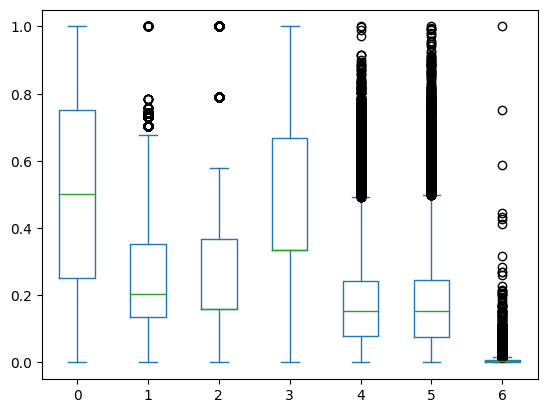

In [200]:
temp  = pd.DataFrame(scaler.fit_transform(data_numeric1))
temp.plot(kind = "box")

In [201]:
round(data_numeric1.corr(),2)

,Id,Engine Size(L),Cylinders,Num Trans,Numeric Fuel City,Numeric Fuel Hwy,Numeric Fuel Comb
Id,1.00,-0.00,-0.00,0.00,0.01,-0.00,0.00
Engine Size(L),-0.00,1.00,0.91,0.13,0.16,0.13,-0.03
Cylinders,-0.00,0.91,1.00,0.17,0.15,0.13,-0.03
Num Trans,0.00,0.13,0.17,1.00,0.03,0.03,-0.01
Numeric Fuel City,0.01,0.16,0.15,0.03,1.00,0.07,-0.14
Numeric Fuel Hwy,-0.00,0.13,0.13,0.03,0.07,1.00,-0.12
Numeric Fuel Comb,0.00,-0.03,-0.03,-0.01,-0.14,-0.12,1.00


In [202]:
data_numeric1.isna().sum()

Id                       0
Engine Size(L)       10238
Cylinders             8552
Num Trans             7709
Numeric Fuel City     2513
Numeric Fuel Hwy      2598
Numeric Fuel Comb     2765
dtype: int64

### Imputation Missing Value with Median Value

In [203]:
data_numeric2 = data_numeric1.copy()
data_numeric2 = data_numeric2.fillna(data_numeric2.median())
data_numeric2.describe()

,Id,Engine Size(L),Cylinders,Num Trans,Numeric Fuel City,Numeric Fuel Hwy,Numeric Fuel Comb
count,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000
mean,166529.500000,2.893802,4.958401,6.649568,13.992341,10.447603,15.682800
std,16967.314048,1.138565,1.509408,1.215504,9.653917,7.422767,26.703834
min,137142.000000,1.000000,2.500000,4.000000,0.000000,0.000000,0.020000
25%,151835.750000,2.000000,4.000000,6.000000,6.651506,4.830000,6.380000
50%,166529.500000,2.500000,4.000000,6.000000,12.627671,9.268920,11.510000
75%,181223.250000,3.500000,6.000000,8.000000,19.610000,14.610000,18.260000
max,195917.000000,8.400000,12.000000,10.000000,82.130000,60.975610,2433.080000


<Axes: >

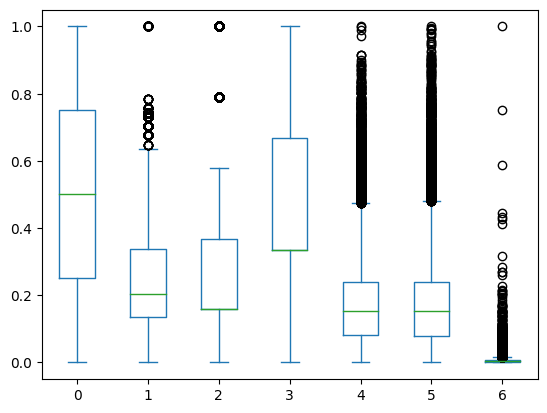

In [204]:
temp  = pd.DataFrame(scaler.fit_transform(data_numeric2))
temp.plot(kind = "box")

### Trying Imputation with Mean Value

In [205]:
data_numeric3 = data_numeric1.copy()
data_numeric3 = data_numeric3.fillna(data_numeric3.mean())
data_numeric3.describe()

,Id,Engine Size(L),Cylinders,Num Trans,Numeric Fuel City,Numeric Fuel Hwy,Numeric Fuel Comb
count,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000
mean,166529.500000,2.976866,5.121595,6.747626,14.053295,10.502112,15.888791
std,16967.314048,1.124108,1.456676,1.189014,9.649608,7.418438,26.687735
min,137142.000000,1.000000,2.500000,4.000000,0.000000,0.000000,0.020000
25%,151835.750000,2.000000,4.000000,6.000000,6.651506,4.830000,6.380000
50%,166529.500000,2.976866,4.000000,6.000000,13.200000,9.747206,12.070000
75%,181223.250000,3.500000,6.000000,8.000000,19.610000,14.610000,18.260000
max,195917.000000,8.400000,12.000000,10.000000,82.130000,60.975610,2433.080000


<Axes: >

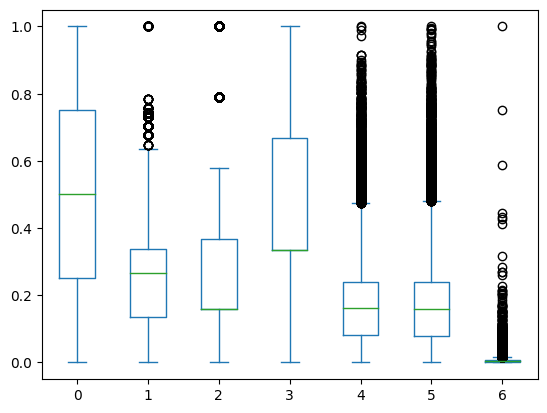

In [206]:
temp  = pd.DataFrame(scaler.fit_transform(data_numeric3))
temp.plot(kind = "box")

## Tranformation

### Using SQRT

In [207]:
import numpy as np

In [208]:
c = 0.00001

columns_to_exclude = ['Id', 'CO2 Emissions(g/km)']

df_transformed = data_numeric3.apply(lambda x: np.sqrt(x + c) if x.name not in columns_to_exclude and np.issubdtype(x.dtype, np.number) else x)
df_transformed.describe()

,Id,Engine Size(L),Cylinders,Num Trans,Numeric Fuel City,Numeric Fuel Hwy,Numeric Fuel Comb
count,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000
mean,166529.500000,1.697087,2.242595,2.588001,3.499399,3.017026,3.552171
std,16967.314048,0.311082,0.303929,0.223355,1.344449,1.183090,1.808573
min,137142.000000,1.000005,1.581142,2.000002,0.003162,0.003162,0.141457
25%,151835.750000,1.414217,2.000002,2.449492,2.579053,2.197728,2.525868
50%,166529.500000,1.725362,2.000002,2.449492,3.633182,3.122053,3.474192
75%,181223.250000,1.870831,2.449492,2.828429,4.428319,3.822304,4.273173
max,195917.000000,2.898277,3.464103,3.162279,9.062561,7.808689,49.326261


<Axes: >

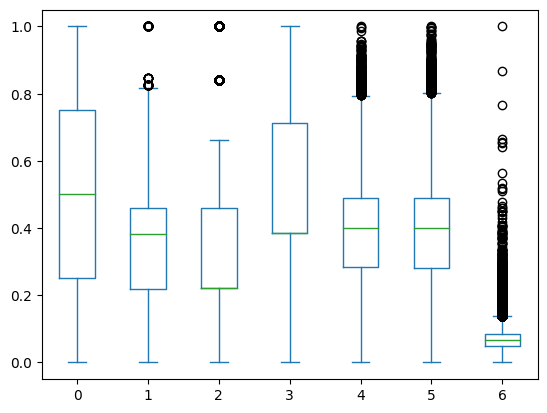

In [209]:
temp  = pd.DataFrame(scaler.fit_transform(df_transformed))
temp.plot(kind = "box")

In [133]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137141 entries, 0 to 137140
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id                   137141 non-null  int64  
 1   Engine Size(L)       137141 non-null  float64
 2   Cylinders            137141 non-null  float64
 3   Num Trans            137141 non-null  float64
 4   Numeric Fuel City    137141 non-null  float64
 5   Numeric Fuel Hwy     137141 non-null  float64
 6   Numeric Fuel Comb    137141 non-null  float64
 7   CO2 Emissions(g/km)  137141 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 8.4 MB


## Feature Selection in Numerical Data

### Correlation Between Numerical Dataset

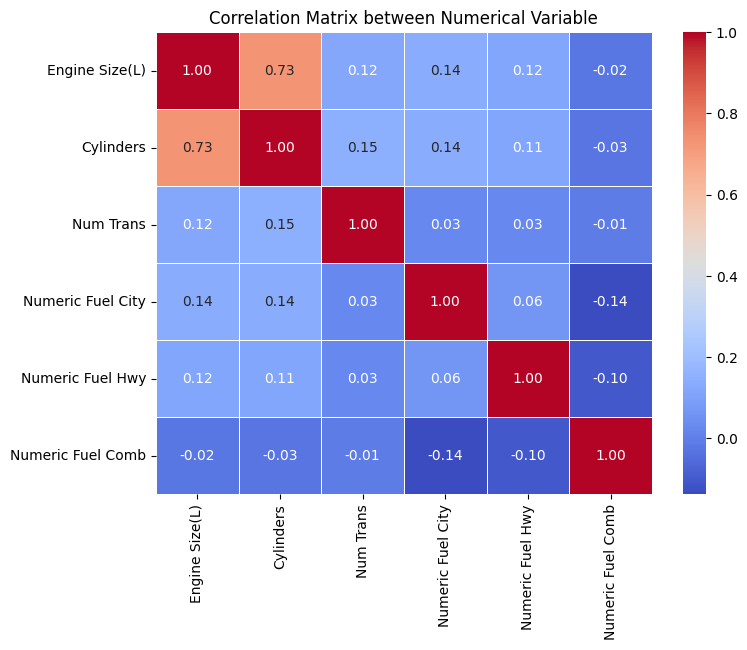

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt


temp_cor = df_transformed.drop(columns=['Id'])
correlation_matrix = temp_cor.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix between Numerical Variable')
plt.show()

Numerical Fuel Comb and City have very strong positive correlation, then we can choose one variable between Combination or City.   
The correlation Fuel Combination with Target Variable is more strong than Fuel City. So, **Fuel Combination** can be choosen

### Univariate Feature Selection

In [135]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137141 entries, 0 to 137140
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id                   137141 non-null  int64  
 1   Engine Size(L)       137141 non-null  float64
 2   Cylinders            137141 non-null  float64
 3   Num Trans            137141 non-null  float64
 4   Numeric Fuel City    137141 non-null  float64
 5   Numeric Fuel Hwy     137141 non-null  float64
 6   Numeric Fuel Comb    137141 non-null  float64
 7   CO2 Emissions(g/km)  137141 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 8.4 MB


In [136]:
from sklearn.feature_selection import SelectKBest, f_regression

X_lab = df_transformed.columns.difference(['Id', 'CO2 Emissions(g/km)'])
X = df_transformed[X_lab]
y = df_transformed["CO2 Emissions(g/km)"]

# Select the top 5 features based on f_regression
selector = SelectKBest(score_func=f_regression, k='all')
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

scores = selector.scores_
p_values = selector.pvalues_

# Create a DataFrame to display the results
results_df = pd.DataFrame({'Feature': X.columns, 'Score': scores, 'P-value': p_values})

# Display the results
print(results_df)

             Feature         Score  P-value
0          Cylinders  45165.874067      0.0
1     Engine Size(L)  43763.357732      0.0
2          Num Trans   1750.327801      0.0
3  Numeric Fuel City   5686.026854      0.0
4  Numeric Fuel Comb   9805.422841      0.0
5   Numeric Fuel Hwy   4056.707569      0.0


### Regresi Lasso

In [137]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_lab = df_transformed.columns.difference(['Id', 'CO2 Emissions(g/km)'])
X = df_transformed[X_lab]
y = df_transformed["CO2 Emissions(g/km)"]

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Menggunakan regresi Lasso
lasso = Lasso(alpha=0.1)  # Atur alpha sesuai kebutuhan
lasso.fit(X_train_scaled, y_train)

# Menampilkan koefisien yang tidak nol
selected_features = X.columns[lasso.coef_ != 0]
print("Selected Features:", selected_features)

Selected Features: Index(['Cylinders', 'Engine Size(L)', 'Num Trans', 'Numeric Fuel City',
       'Numeric Fuel Comb', 'Numeric Fuel Hwy'],
      dtype='object')


In [211]:
# MinMaxScaler in Data Numeric
columns_to_scale = df_transformed.columns.difference(['Id', 'CO2 Emissions(g/km)'])

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Lakukan scaling pada kolom yang dipilih
df_numeric_clean = df_transformed.copy()
df_numeric_clean[columns_to_scale] = scaler.fit_transform(df_transformed[columns_to_scale])
df_numeric_clean.describe()

,Id,Engine Size(L),Cylinders,Num Trans,Numeric Fuel City,Numeric Fuel Hwy,Numeric Fuel Comb
count,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000
mean,166529.500000,0.367219,0.351284,0.505902,0.385924,0.386119,0.069345
std,16967.314048,0.163877,0.161410,0.192170,0.148404,0.151571,0.036771
min,137142.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,151835.750000,0.218205,0.222448,0.386732,0.284334,0.281155,0.048479
50%,166529.500000,0.382115,0.222448,0.386732,0.400691,0.399575,0.067759
75%,181223.250000,0.458747,0.461162,0.712762,0.488460,0.489287,0.084004
max,195917.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [212]:
data_numeric_clean  = df_numeric_clean.drop(columns = ["Numeric Fuel City"])
data_numeric_clean.describe()

,Id,Engine Size(L),Cylinders,Num Trans,Numeric Fuel Hwy,Numeric Fuel Comb
count,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000
mean,166529.500000,0.367219,0.351284,0.505902,0.386119,0.069345
std,16967.314048,0.163877,0.161410,0.192170,0.151571,0.036771
min,137142.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,151835.750000,0.218205,0.222448,0.386732,0.281155,0.048479
50%,166529.500000,0.382115,0.222448,0.386732,0.399575,0.067759
75%,181223.250000,0.458747,0.461162,0.712762,0.489287,0.084004
max,195917.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature Selection ini Categorical Data

In [213]:
df_cat = categoric_encoded.copy()
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58776 entries, 0 to 58775
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Id                              58776 non-null  int64
 1   Coded_ASURA                     58776 non-null  uint8
 2   Coded_BARUSU                    58776 non-null  uint8
 3   Coded_BMV                       58776 non-null  uint8
 4   Coded_CADILUXE                  58776 non-null  uint8
 5   Coded_CHEVO                     58776 non-null  uint8
 6   Coded_DOGE                      58776 non-null  uint8
 7   Coded_FIAR                      58776 non-null  uint8
 8   Coded_FOLD                      58776 non-null  uint8
 9   Coded_FOLKSWA                   58776 non-null  uint8
 10  Coded_GONDA                     58776 non-null  uint8
 11  Coded_JIPU                      58776 non-null  uint8
 12  Coded_KIO                       58776 non-null  uint8
 13  C

### Drop Useless Encoded

### Chi-Square Method

In [144]:
from sklearn.feature_selection import SelectKBest, chi2
from scipy.stats import chi2_contingency

df_temp = df_cat.merge(data_numeric_clean, left_on = "Id", right_on = "Id")
df_temp = df_temp.drop(columns = ["Id", "Engine Size(L)", "Cylinders",	"Num Trans", 	"Numeric Fuel Hwy", "Numeric Fuel Comb"])

for col1 in df_temp.columns[:-1]:  # Loop semua variabel kecuali variabel target
  contingency_table = pd.crosstab(df_temp[col1], df_temp["CO2 Emissions(g/km)"])
  chi2, p, _, _ = chi2_contingency(contingency_table)
  if p >= 0.05 :
    print(f"Chi-square test for {col1} and Target Var:")
    print(f"Chi-square value: {chi2}")
    print(f"P-value: {p}")
    print("\n")

Chi-square test for Coded_N and Target Var:
Chi-square value: 311.73567931107317
P-value: 1.0




## GUNAIN DULU LAH YA WKWKWK

In [214]:
df_merge = data_numeric_clean.merge(df_cat, left_on = "Id", right_on = "Id")
df_merge.describe()

,Id,Engine Size(L),Cylinders,Num Trans,Numeric Fuel Hwy,Numeric Fuel Comb,Coded_ASURA,Coded_BARUSU,Coded_BMV,Coded_CADILUXE,...,Coded_D,Coded_E,Coded_N,Coded_X,Coded_Z,Coded_A,Coded_AM,Coded_AS,Coded_AV,Coded_M
count,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000,...,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000
mean,166529.500000,0.367219,0.351284,0.505902,0.386119,0.069345,0.014615,0.028464,0.107459,0.033143,...,0.020144,0.048523,0.000238,0.662532,0.268562,0.191149,0.046056,0.488975,0.105332,0.168487
std,16967.314048,0.163877,0.161410,0.192170,0.151571,0.036771,0.120006,0.166296,0.309698,0.179011,...,0.140495,0.214871,0.015432,0.472850,0.443215,0.393210,0.209609,0.499883,0.306983,0.374301
min,137142.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,151835.750000,0.218205,0.222448,0.386732,0.281155,0.048479,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,166529.500000,0.382115,0.222448,0.386732,0.399575,0.067759,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,181223.250000,0.458747,0.461162,0.712762,0.489287,0.084004,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,195917.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [215]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58776 entries, 0 to 58775
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              58776 non-null  int64  
 1   Engine Size(L)                  58776 non-null  float64
 2   Cylinders                       58776 non-null  float64
 3   Num Trans                       58776 non-null  float64
 4   Numeric Fuel Hwy                58776 non-null  float64
 5   Numeric Fuel Comb               58776 non-null  float64
 6   Coded_ASURA                     58776 non-null  uint8  
 7   Coded_BARUSU                    58776 non-null  uint8  
 8   Coded_BMV                       58776 non-null  uint8  
 9   Coded_CADILUXE                  58776 non-null  uint8  
 10  Coded_CHEVO                     58776 non-null  uint8  
 11  Coded_DOGE                      58776 non-null  uint8  
 12  Coded_FIAR                      

In [216]:
df_merge.to_csv("data_clean_test 8-12.csv")

# Modelling

## Partition Data

In [148]:
X = df_merge.drop(columns=['Id'])
X = X.drop(columns=['CO2 Emissions(g/km)'])

y = df_merge['CO2 Emissions(g/km)']
display(X)

,Engine Size(L),Cylinders,Num Trans,Numeric Fuel Hwy,Numeric Fuel Comb,Coded_ASURA,Coded_BARUSU,Coded_BMV,Coded_CADILUXE,Coded_CHEVO,...,Coded_D,Coded_E,Coded_N,Coded_X,Coded_Z,Coded_A,Coded_AM,Coded_AS,Coded_AV,Coded_M
0,0.458747,0.461162,0.386732,0.300162,0.327335,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0.685977,0.364442,0.386732,0.672312,0.668123,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
2,0.578218,0.364442,0.386732,0.172429,0.148226,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.383458,0.222448,0.386732,0.483258,0.483819,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0.385640,0.461162,0.514169,0.296715,0.453530,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137136,0.383458,0.662407,0.712762,0.336144,0.580358,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
137137,0.118394,0.222448,0.386732,0.112749,0.229979,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
137138,0.179974,0.222448,0.514169,0.350730,0.273562,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
137139,0.179974,0.222448,0.514169,0.056690,0.299920,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=123)

In [150]:
from sklearn.metrics import mean_squared_error

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(
                                  n_estimators=1000,
                                  criterion='squared_error',
                                  max_depth=None,
                                  min_samples_split=2,
                                  min_samples_leaf=1,
                                  max_features='sqrt',
                                  random_state=123)

rf_model.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=1000, random_state=123)

In [ ]:
# Lakukan prediksi pada set pengujian
y_pred = rf_model.predict(X_test)

# Hitung RMSE pada set pengujian
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE on test set: {rmse_test}')


RMSE on test set: 48.895132616415125


## Trying tuning parameter in Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

NameError: ignored

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=123, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

NameError: ignored

In [ ]:
rf_random.best_params_

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    rmse = sqrt(mean_squared_error(test_features, predictions))
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('RMSE = {:0.4f}'.format(rmse))

    return accuracy


In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test_features, test_labels)

## XGBoost

In [157]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

model = xgb.XGBRegressor(booster='gbtree',
                       n_estimators=10000, early_stopping_rounds=100,
                       objective='reg:linear', #max_depth=59, #21 terbaik menggunakan CPU
                       learning_rate=0.1,
                      gamma=21,
                      # min_child_weight=27,
                      #num_parralel_tree=100,
                      # max_delta_step=9,
                      #grow_policy = 'lossguide',
                      #reg_alpha=1,
                      #colsample_bytree=1,
                      #subsample= 0.9,
                      #tree_method='gpu_hist',
                      # tree_method='approx',
                      #gpu_id=0,
                      random_state=123)
#model.fit(X_train, y_train,
#        eval_set=[(X_train, y_train), (X_test, y_test)],
#        verbose=25)

model.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:76.71244


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:22:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:59.04809
[200]	validation_0-rmse:53.93413
[300]	validation_0-rmse:51.85226
[400]	validation_0-rmse:50.72485
[500]	validation_0-rmse:50.12506
[600]	validation_0-rmse:49.74288
[700]	validation_0-rmse:49.46388
[800]	validation_0-rmse:49.20371
[900]	validation_0-rmse:48.98194
[1000]	validation_0-rmse:48.81098
[1100]	validation_0-rmse:48.66173
[1200]	validation_0-rmse:48.53823
[1300]	validation_0-rmse:48.43453
[1400]	validation_0-rmse:48.34544
[1500]	validation_0-rmse:48.25848
[1600]	validation_0-rmse:48.20402
[1700]	validation_0-rmse:48.14392
[1800]	validation_0-rmse:48.07214
[1900]	validation_0-rmse:48.02228
[2000]	validation_0-rmse:47.98164
[2100]	validation_0-rmse:47.92646
[2200]	validation_0-rmse:47.86355
[2300]	validation_0-rmse:47.81666
[2400]	validation_0-rmse:47.77988
[2500]	validation_0-rmse:47.74552
[2600]	validation_0-rmse:47.72555
[2700]	validation_0-rmse:47.70183
[2800]	validation_0-rmse:47.68506
[2900]	validation_0-rmse:47.66365
[3000]	validation_0-rms

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=100,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [176]:

model2 = xgb.XGBRegressor(booster='gbtree',
                       n_estimators=2000, early_stopping_rounds=100,
                       objective='reg:absoluteerror', #max_depth=59, #21 terbaik menggunakan CPU
                       learning_rate=0.1,
                      # gamma=0,
                        # sampling_method = 'gradient_based',
                      # min_child_weight=27,
                      #num_parralel_tree=100,
                      # max_delta_step=9,
                      #grow_policy = 'lossguide',
                      #reg_alpha=1,
                      #colsample_bytree=1,
                      subsample= 0.9,
                      #tree_method='gpu_hist',
                      # tree_method='approx',
                      #gpu_id=0,
                          eval_metric = 'rmse',
                      random_state=123)
#model.fit(X_train, y_train,
#        eval_set=[(X_train, y_train), (X_test, y_test)],
#        verbose=25)

model2.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:75.79318
[100]	validation_0-rmse:50.14824
[200]	validation_0-rmse:48.85883
[300]	validation_0-rmse:48.33195
[400]	validation_0-rmse:48.03857
[500]	validation_0-rmse:47.87759
[600]	validation_0-rmse:47.75535
[700]	validation_0-rmse:47.71219
[800]	validation_0-rmse:47.68070
[900]	validation_0-rmse:47.64805
[1000]	validation_0-rmse:47.64195
[1100]	validation_0-rmse:47.62255
[1200]	validation_0-rmse:47.61478
[1300]	validation_0-rmse:47.60596
[1400]	validation_0-rmse:47.59468
[1500]	validation_0-rmse:47.57920
[1600]	validation_0-rmse:47.57468
[1700]	validation_0-rmse:47.55946
[1800]	validation_0-rmse:47.55481
[1900]	validation_0-rmse:47.54348
[1999]	validation_0-rmse:47.53511


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=100,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, objective='reg:absoluteerror', ...)

In [177]:
y_pred = model2.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

RMSE: 47.53511438376581


In [217]:
X_testing = df_merge.drop(columns=['Id'])
y_predict_ril = model2.predict(X_testing)
y_predict_ril

array([246.60548, 419.03012, 200.41408, ..., 316.6635 , 253.73546,
       261.9209 ], dtype=float32)

In [218]:
data_pred = pd.DataFrame()
data_pred["Id"] = df_merge["Id"]
data_pred["CO2 Emissions(g/km)"] =y_predict_ril

data_pred.head()


,Id,CO2 Emissions(g/km)
0,137142,246.605484
1,137143,419.030121
2,137144,200.414078
3,137145,328.543549
4,137146,390.210968


In [220]:
data_pred.to_csv("coba sub-1-new-encoded.csv", index = False)

<Axes: >

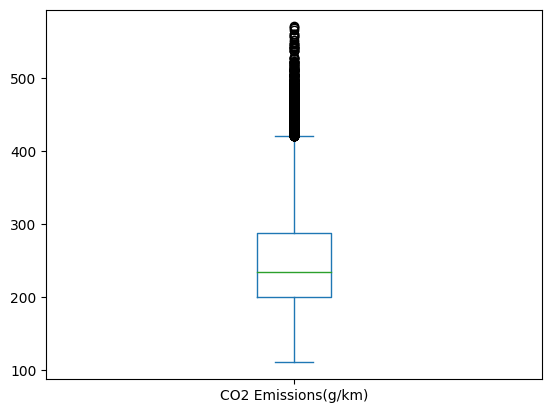

In [222]:
data_pred["CO2 Emissions(g/km)"].plot(kind = "box")

In [223]:
data_pred.describe()

,Id,CO2 Emissions(g/km)
count,58776.000000,58776.000000
mean,166529.500000,248.706299
std,16967.314048,65.793404
min,137142.000000,110.368080
25%,151835.750000,200.171272
50%,166529.500000,234.817436
75%,181223.250000,288.527794
max,195917.000000,571.012512


## SVR

In [ ]:
from sklearn.svm import SVR
from math import sqrt
# Initialize the SVR model
svr_model = SVR(kernel='rbf', C=1.0)

# Fit the SVR model to the training data
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

RMSE: 51.249147457604465


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_test = pd.read_csv("/content/drive/MyDrive/Data Slayer/data test.csv")
data_test.head()

,Unnamed: 0,Id,Engine Size(L),Cylinders,Num Trans,Numeric Fuel Hwy,Numeric Fuel Comb,Coded_ASURA,Coded_BARUSU,Coded_BMV,...,Coded_X,Coded_Z,Coded_A,Coded_AM,Coded_AS,Coded_AV,Coded_M,Coded_mi,Coded_no,Coded_un
0,0,137142,0.472299,0.361996,0.712695,0.160087,0.389751,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,1,137143,0.486091,0.460988,0.386643,0.479084,0.554264,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,2,137144,0.763342,0.361996,0.386643,0.403340,0.554658,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,3,137145,0.602689,0.361996,0.712695,0.504391,0.526517,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,4,137146,0.577839,0.662272,0.712695,0.554829,0.742955,0,0,1,...,0,1,0,0,1,0,0,0,0,0


In [ ]:
data_test = data_test.drop(columns = ["Unnamed: 0"])
data_test.head()

,Id,Engine Size(L),Cylinders,Num Trans,Numeric Fuel Hwy,Numeric Fuel Comb,Coded_ASURA,Coded_BARUSU,Coded_BMV,Coded_CADILUXE,...,Coded_X,Coded_Z,Coded_A,Coded_AM,Coded_AS,Coded_AV,Coded_M,Coded_mi,Coded_no,Coded_un
0,137142,0.472299,0.361996,0.712695,0.160087,0.389751,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
1,137143,0.486091,0.460988,0.386643,0.479084,0.554264,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,137144,0.763342,0.361996,0.386643,0.403340,0.554658,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,137145,0.602689,0.361996,0.712695,0.504391,0.526517,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,137146,0.577839,0.662272,0.712695,0.554829,0.742955,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0


In [ ]:
data_test.describe()

,Id,Engine Size(L),Cylinders,Num Trans,Numeric Fuel Hwy,Numeric Fuel Comb,Coded_ASURA,Coded_BARUSU,Coded_BMV,Coded_CADILUXE,...,Coded_X,Coded_Z,Coded_A,Coded_AM,Coded_AS,Coded_AV,Coded_M,Coded_mi,Coded_no,Coded_un
count,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000,...,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000,58776.000000
mean,166529.500000,0.366824,0.351129,0.505826,0.378668,0.436133,0.014615,0.028464,0.107459,0.033143,...,0.623265,0.268562,0.191149,0.046056,0.438121,0.105332,0.168487,0.005802,0.019549,0.018749
std,16967.314048,0.163880,0.161410,0.192183,0.153265,0.131473,0.120006,0.166296,0.309698,0.179011,...,0.484572,0.443215,0.393210,0.209609,0.496160,0.306983,0.374301,0.075948,0.138445,0.135639
min,137142.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,151835.750000,0.217812,0.222300,0.386643,0.272397,0.347433,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,166529.500000,0.381669,0.222300,0.386643,0.392207,0.437797,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,181223.250000,0.458315,0.460988,0.712695,0.483001,0.524462,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,195917.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
ready_test = data_test.drop(columns = ["Id"])

In [ ]:
y_predict = model.predict(ready_test)
display(y_predict)

array([253.37634, 405.08496, 215.01353, ..., 316.7213 , 304.5162 ,
       263.02344], dtype=float32)

In [ ]:
coba1 = pd.DataFrame()

coba1["Id"] = data_test["Id"]
coba1["CO2 Emissions(g/km)"] = y_predict

coba1.head()

,Id,CO2 Emissions(g/km)
0,137142,253.376343
1,137143,405.084961
2,137144,215.013535
3,137145,307.130249
4,137146,355.827332


In [ ]:
coba1.to_csv("coba1.csv", index = False)